In [1]:
# import libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/s4/gkgb_yx16d7f_nl9171_5vb40000gn/T/ipykernel_4779/4037983478.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import main db, and show the first 3 rows.
# the database has been fliter on the website (excluded those location without full time workhour's/error record)
path1 = '/Users/tantuyu/Documents/selflearning /analysis case/Fliter_PBJ_Daily_Nurse_Staffing_Q1_2024.csv'
df = pd.read_csv(path1, encoding='latin-1') 
# after the utf-8 not working, I tried the next most likely option, 'latin-1' and it works
df.head(3)

,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,"STELLA MARIS, INC.",TIMONIUM,MD,Baltimore,5,20240329,343,8.0,8.0,0.0,...,41.50,744.75,487.75,257.00,61.00,61.00,0.0,88.75,88.75,0.0
1,"STELLA MARIS, INC.",TIMONIUM,MD,Baltimore,5,20240328,340,8.0,8.0,0.0,...,49.50,757.75,494.50,263.25,56.75,56.75,0.0,85.00,85.00,0.0
2,"STELLA MARIS, INC.",TIMONIUM,MD,Baltimore,5,20240326,336,8.0,8.0,0.0,...,12.75,763.50,532.75,230.75,54.00,54.00,0.0,98.00,98.00,0.0


In [7]:
df_temp=df[['Hrs_RNDON_ctr','Hrs_RNadmin_ctr','Hrs_RN_ctr','Hrs_LPNadmin_ctr','Hrs_LPN_ctr','Hrs_CNA_ctr','Hrs_NAtrn_ctr','Hrs_MedAide_ctr']]
df_temp_sum = df[['Hrs_RNDON_ctr','Hrs_RNadmin_ctr','Hrs_RN_ctr','Hrs_LPNadmin_ctr','Hrs_LPN_ctr','Hrs_CNA_ctr','Hrs_NAtrn_ctr','Hrs_MedAide_ctr']].sum()
count_sum = df_temp_sum.sort_values(ascending=False)
count_sum
# As the result we can see that the most work hours on contractor is CNA (certufued Nursing Assitant)
# Follow by LPN (Licensed Pratical Nurse)

Hrs_CNA_ctr         187518.03
Hrs_LPN_ctr         106436.27
Hrs_RN_ctr           43989.05
Hrs_RNadmin_ctr      12223.54
Hrs_MedAide_ctr      11024.24
Hrs_RNDON_ctr         2863.03
Hrs_LPNadmin_ctr      1339.69
Hrs_NAtrn_ctr          772.10
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'MO'),
  Text(1, 0, 'IN'),
  Text(2, 0, 'NH'),
  Text(3, 0, 'OR'),
  Text(4, 0, 'TX'),
  Text(5, 0, 'KY'),
  Text(6, 0, 'MD'),
  Text(7, 0, 'OH'),
  Text(8, 0, 'MN'),
  Text(9, 0, 'NM')])

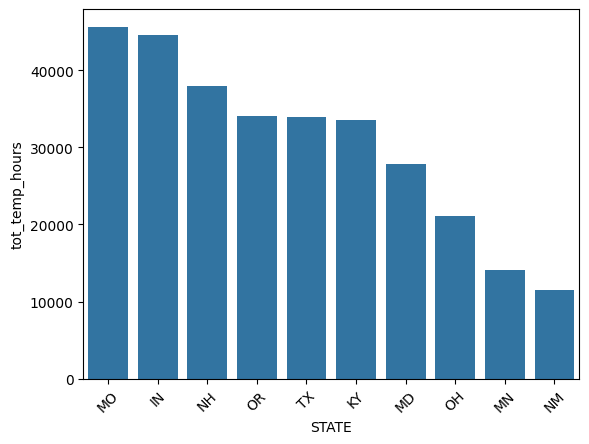

In [4]:
# find out which state have the highest work hours
temp=['Hrs_RNDON_ctr','Hrs_RNadmin_ctr','Hrs_RN_ctr','Hrs_LPNadmin_ctr','Hrs_LPN_ctr','Hrs_CNA_ctr','Hrs_NAtrn_ctr','Hrs_MedAide_ctr']
df['tot_temp_hours'] = df[temp].sum(axis=1)
states_tot = df.groupby('STATE')[['tot_temp_hours']].sum()
states_tot = states_tot.sort_values(by='tot_temp_hours',ascending=False).head(10) # narrow down to 10 states for better performance

sns.barplot(data=states_tot, x='STATE',y='tot_temp_hours')
plt.xticks(rotation=45)

(-1.099999024743626,
 1.0999999468508685,
 -1.099999778321763,
 1.0999999894438934)

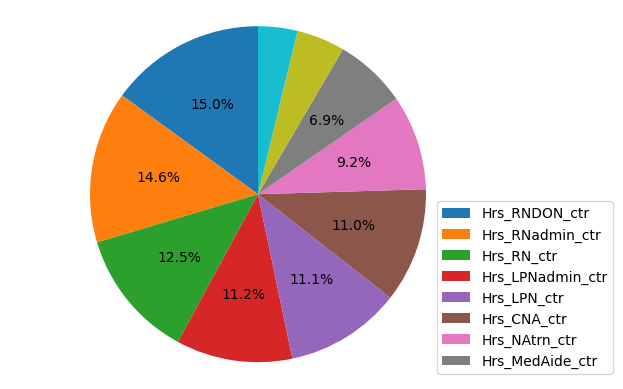

In [8]:
# perform a pie chart for better understanding

# since the smaller ratio will be unreadable, we should filter it out first
def fli_format(pct):
    return('%1.1f%%' %pct) if pct >5 else ''

# syntax for pie chart
plt.pie(states_tot['tot_temp_hours'],autopct=fli_format, startangle=90)
plt.legend(labels=df[temp], loc= 'upper right', bbox_to_anchor=(1.23,0.5))

# ensure it stays as circle
plt.axis('equal')

In [6]:
# load provider information and Skilled nuring facility quality
pi_df = pd.read_csv('/Users/tantuyu/Documents/selflearning /analysis case/NH_ProviderInfo_Aug2024.csv')
sn_df = pd.read_csv('/Users/tantuyu/Documents/selflearning /analysis case/Skilled_Nursing_Facility_Quality_Reporting_Program_Provider_Data_Aug2024.csv')

/var/folders/s4/gkgb_yx16d7f_nl9171_5vb40000gn/T/ipykernel_17596/930644756.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sn_df = pd.read_csv('/Users/tantuyu/Documents/selflearning /analysis case/Skilled_Nursing_Facility_Quality_Reporting_Program_Provider_Data_Aug2024.csv')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'For profit - Corporation'),
  Text(1, 0, 'For profit - Individual'),
  Text(2, 0, 'For profit - Limited Liability company'),
  Text(3, 0, 'For profit - Partnership'),
  Text(4, 0, 'Government - City'),
  Text(5, 0, 'Government - City/county'),
  Text(6, 0, 'Government - County'),
  Text(7, 0, 'Government - Federal'),
  Text(8, 0, 'Government - Hospital district'),
  Text(9, 0, 'Government - State'),
  Text(10, 0, 'Non profit - Church related'),
  Text(11, 0, 'Non profit - Corporation'),
  Text(12, 0, 'Non profit - Other')])

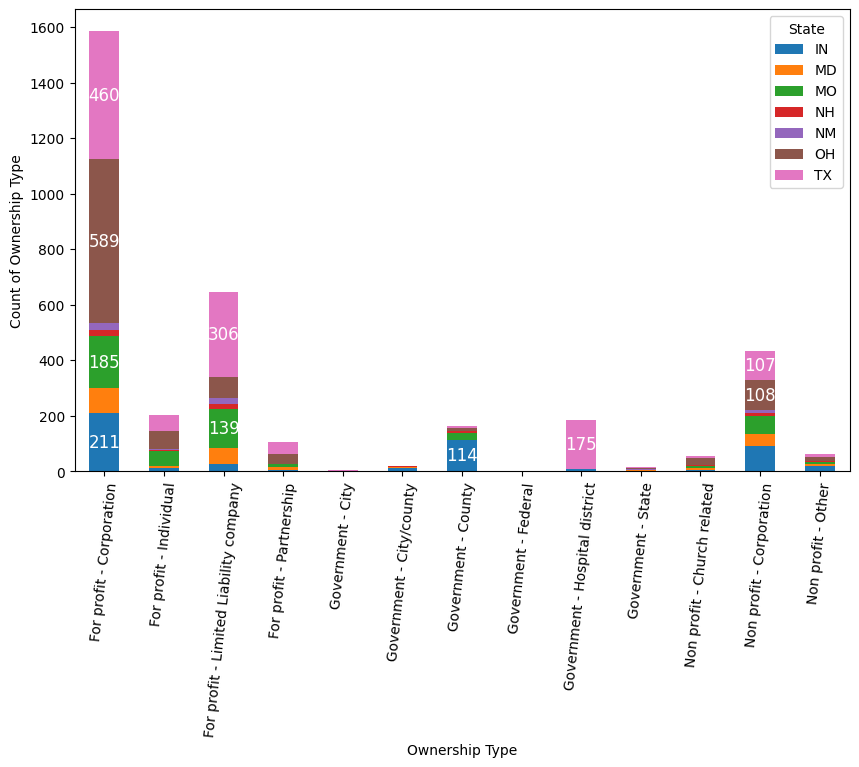

In [182]:
Top_10 = ['MO', 'IN', 'NH', 'OR', 'TX', 'KY', 'MD', 'OH', 'MN', 'NM'] # top 10 states
fliter_pi_df = pi_df[pi_df['State'].isin(['IN','MO','NM','TX','OH','NH','MD'])] # narrow down to 10 states for better performance

# creating a stacked bar chart
ow_count=fliter_pi_df.groupby(['Ownership Type','State']).size().unstack(fill_value=0) 
ax=ow_count.plot(kind='bar',stacked=True,figsize=(10,6))


# add an center label for readablility
for p in ax.patches:
    height = p.get_height()
    if height > 100:  # flitering out the none/small valuer
        ax.text(p.get_x() + p.get_width()/2., p.get_y() +height /2.,
                f'{int(height)}', ha='center', va='center', color='white', fontsize=12)
        # get_x : center the label text
        # get_y : center the label text to the middle of each bar
        
plt.ylabel('Count of Ownership Type')
plt.xticks(rotation=84)


In [189]:
# calculate the average score in each top 10 state from the skilled nurse db
fliter_sn= sn_df[sn_df['State'].isin(Top_10)] # narrow down to top 10 states for better performance

# flitter out the string statements and the errors
fliter_sn['Score']=pd.to_numeric(sn_df['Score'], errors='coerce') 
fliter_sn=fliter_sn.dropna(subset=['Score']) 

# order by score value
fliter_sn.groupby('State')[['Score']].mean().sort_values(by='Score',ascending=False)


/var/folders/s4/gkgb_yx16d7f_nl9171_5vb40000gn/T/ipykernel_17596/3154773702.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Score
State,
MD,86.206984
NH,56.574700
NM,53.109987
MN,47.149514
IN,47.087695
KY,47.027780
OR,45.830773
TX,44.566356
OH,43.764943


In [153]:
# count the registered nursing house amount by reviewing the CMS certificate number
CCN_count = fliter_sn.groupby('State')[['CMS Certification Number (CCN)']].nunique().sort_values(by='CMS Certification Number (CCN)',ascending=False)

# reset index for creating the plot
CCN_count = CCN_count.reset_index()


# create a heatmap for readability
import plotly.express as px

fig=px.choropleth(CCN_count,
                  locations='State',
                  locationmode='USA-states',
                  color='CMS Certification Number (CCN)',
                  scope='usa',
                  color_continuous_scale='tempo',
                  hover_name='State')

# Set up layout
fig.update_layout(
    coloraxis_colorbar=dict(
        title='CCN Number',
        thickness=12,
        len=0.5,
        x=1.05,          # Horizontal position (move right of the plot)
        xanchor='left',  # Position anchor
        y=0.85,           # Vertical position
        yanchor='top' # Position anchor        
    )
    
    
)

fig.show()

# In this heatmap, we could zoom-in/zoom-out by scrolling, drag to move around.
# When hover, the number of institutions and states name would show


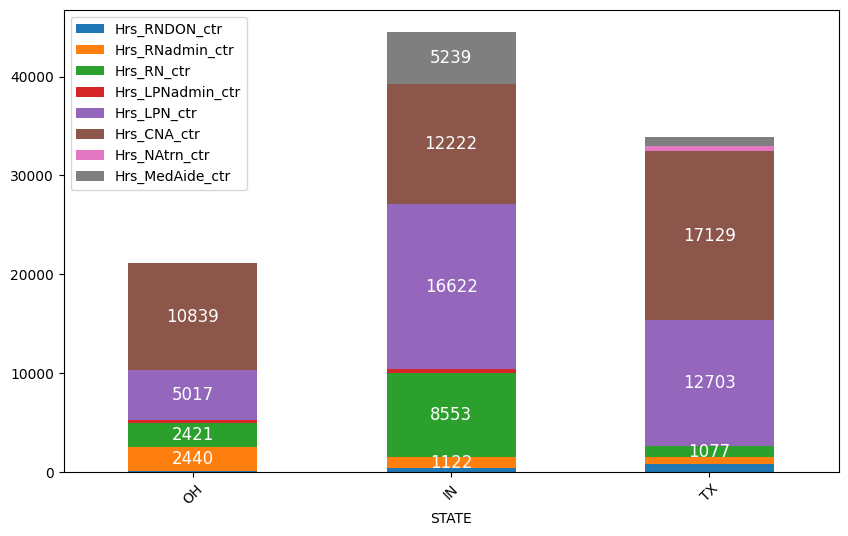

In [171]:
# analysis the nurse type and workhours located in Texas, Ohio, and Indiana
TOI = ['TX', 'OH', 'IN']
worker_type = ['Hrs_RNDON_ctr','Hrs_RNadmin_ctr','Hrs_RN_ctr','Hrs_LPNadmin_ctr','Hrs_LPN_ctr','Hrs_CNA_ctr','Hrs_NAtrn_ctr','Hrs_MedAide_ctr'] # sort out the worker type 
MNN_df = df[df['STATE'].isin(TOI)] # narrow down to only 3 states
MNN_df = MNN_df.groupby('STATE')[worker_type].sum().sort_values(by=worker_type, ascending=True) # order by work hours value

ax = MNN_df.plot(kind='bar',stacked=True,figsize=(10,6))
plt.xticks(rotation=45)

# add an center label for readablility
for p in ax.patches:
    height = p.get_height()
    if height > 1000:  # flitering out the none/small valuer
        ax.text(p.get_x() + p.get_width()/2., p.get_y() +height /2.,
                f'{int(height)}', ha='center', va='center', color='white', fontsize=12)
        # get_x : center the label text
        # get_y : center the label text to the middle of each bar
        
